# Iris Flower Project

Importing all the required libaries for this project.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

Make sure you are working in right versions of the libarary and system.

In [5]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
import sys
print(sys.version)

1.19.1
1.1.1
0.10.1
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


Loading the Iris csv data from data folder.

In [6]:
df = pd.read_csv('data//iris.data')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### Pandas Data Loading

Pandas library read_csv command takes first line as header but in our case we don't have header for this data so reload the data wihout header.

In [7]:
df = pd.read_csv('data//iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now lets add some meaningful column names. We can do that by simply addig array on top of the dataframe.

In [8]:
col_name = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df.columns = col_name
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Lets different classes of the Iris flower which is our target value. Later we will create model to determind the target class of the Iris based on the sepal/petal length/width.

In [9]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Iris Data from Seaborn

Lets load the data in Seaborn to visualize the pattern of the data. Here we are loading the dataset provided by Seaborn itself, not loading our local data. These libarary provides some sample data for farious data science challenges. We can get these data from varous other platforms like wikipedia, kaggle and also we can always google it.

In [10]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Now, lets check the describe set of the data. It will provide you the mean, standard deviation, minimum, 25% ...and max
you can also check same info from pandas dataframe by running following command.

df.describe()

You might see some variation in data with these two approaches but mostly the statistics will be close enough. This is because of the dirty data.

Also keep in mind that we have loaded data from different source for panda and seaborn.

In [11]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


If you look at the data info, there is 150 rows of data and for all the columns we have non null data. i.e we don't have any missing data for this dataset. We don't need any data engineering to fill the data in this case.

Now lets get unique species and their count.

In [13]:
print(iris.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


### Visualisation

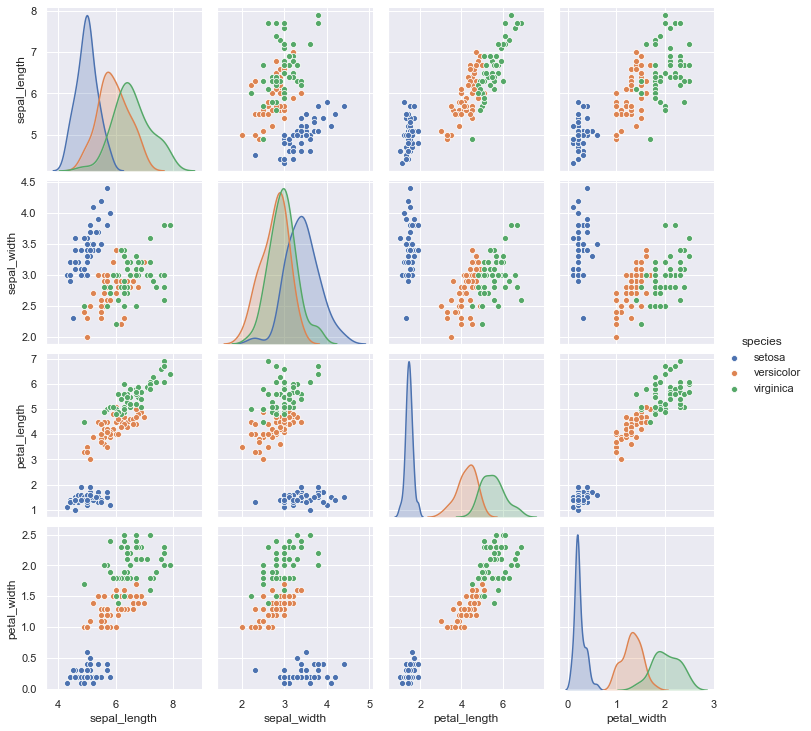

In [14]:
sns.pairplot(iris, hue='species', aspect =1);

The diagonal distribution is plotted against itself so it is giving histogram distribution for each species.

With the distribution above we can say the sepal_length, petal_length and petal_width of Setosa is remarkably less than Versicolor and Virginica.

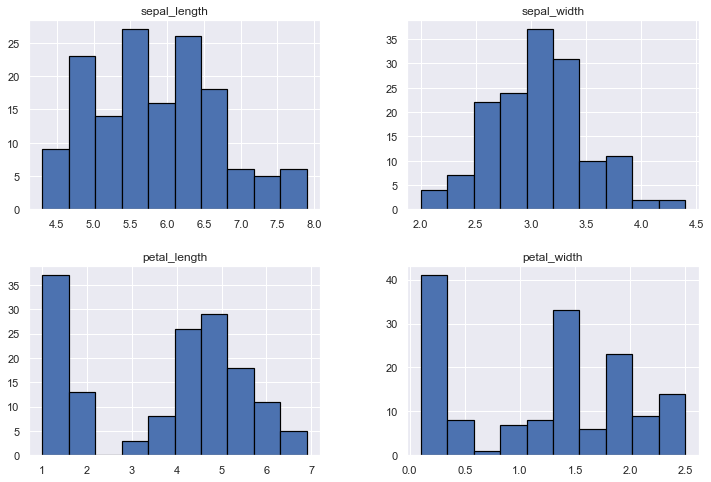

In [16]:
iris.hist(edgecolor='black', linewidth=1.2, figsize=(12,8));
plt.show();

<AxesSubplot:xlabel='species', ylabel='petal_width'>

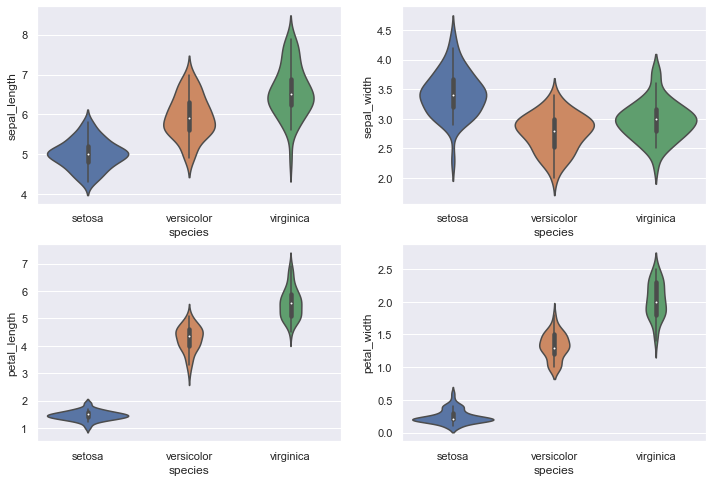

In [17]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.violinplot(x='species', y='sepal_length', data=iris)

plt.subplot(2,2,2)
sns.violinplot(x='species', y='sepal_width', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='species', y='petal_length', data=iris)

plt.subplot(2,2,4)
sns.violinplot(x='species', y='petal_width', data=iris)

With violinplot we can say the petal_length and petal_width for setosa is less. also if you look at the white dot in violinplot you can determine right/left skew of the distribution. Same with box plot below.

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

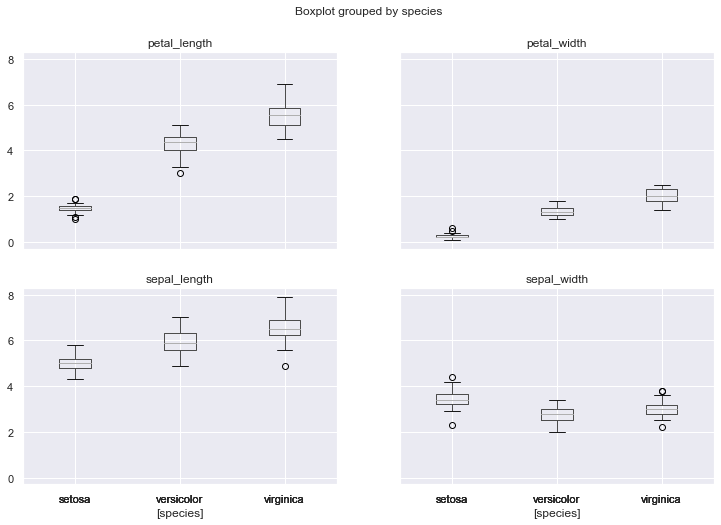

In [18]:
iris.boxplot(by='species', figsize=(12,8))

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

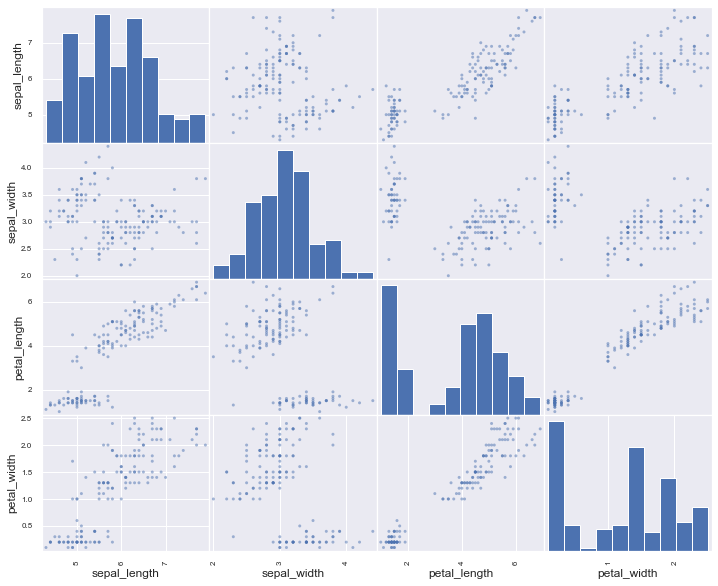

In [20]:
pd.plotting.scatter_matrix(iris, figsize=(12,10))

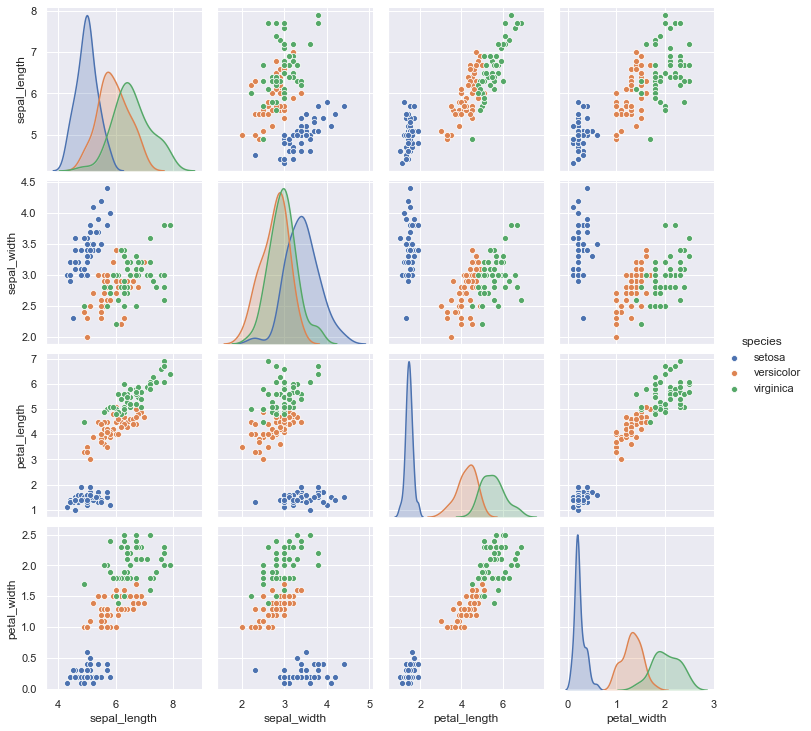

In [22]:
sns.pairplot(iris, hue="species", diag_kind="kde")